<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/RNN_on_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(0,50,500)

In [ ]:
x.shape

(500,)

In [ ]:
y = np.sin(x)

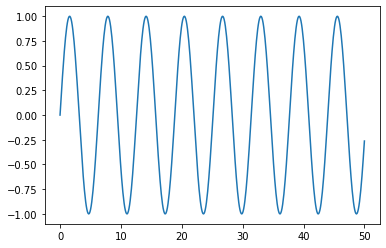

In [ ]:
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [ ]:
df

,Sine
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157
...,...
49.599198,-0.618069
49.699399,-0.536331
49.799599,-0.449212
49.899800,-0.357587


In [ ]:
len(df)

500

In [ ]:
test_percent = 0.1

In [ ]:
a = len(df)*test_percent

In [ ]:
a

50.0

In [ ]:
test_ind = int(len(df)-a)

In [ ]:
test_ind

450

In [ ]:
train = df.iloc[:test_ind]

In [ ]:
test = df.iloc[test_ind:]

In [ ]:
test

,Sine
45.090180,0.894755
45.190381,0.934938
45.290581,0.965741
45.390782,0.986856
45.490982,0.998072
45.591182,0.999275
45.691383,0.990453
45.791583,0.971696
45.891784,0.943191
45.991984,0.905224


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_train = scaler.fit_transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#help(TimeseriesGenerator)

In [ ]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [ ]:
len(generator)

448

In [ ]:
len(scaled_train)

450

In [ ]:
x,y = generator[0]

In [ ]:
x

array([[[0.50000825],
        [0.5500257 ]]])

In [ ]:
y

array([[0.59954139]])

In [ ]:
scaled_train

array([[5.00008248e-01],
       [5.50025701e-01],
       [5.99541392e-01],
       [6.48058595e-01],
       [6.95090598e-01],
       [7.40165588e-01],
       [7.82831387e-01],
       [8.22659982e-01],
       [8.59251825e-01],
       [8.92239836e-01],
       [9.21293088e-01],
       [9.46120127e-01],
       [9.66471896e-01],
       [9.82144230e-01],
       [9.92979910e-01],
       [9.98870236e-01],
       [9.99756115e-01],
       [9.95628663e-01],
       [9.86529284e-01],
       [9.72549261e-01],
       [9.53828838e-01],
       [9.30555812e-01],
       [9.02963653e-01],
       [8.71329156e-01],
       [8.35969671e-01],
       [7.97239914e-01],
       [7.55528412e-01],
       [7.11253602e-01],
       [6.64859637e-01],
       [6.16811929e-01],
       [5.67592478e-01],
       [5.17695042e-01],
       [4.67620176e-01],
       [4.17870219e-01],
       [3.68944247e-01],
       [3.21333073e-01],
       [2.75514319e-01],
       [2.31947626e-01],
       [1.91070043e-01],
       [1.53291642e-01],


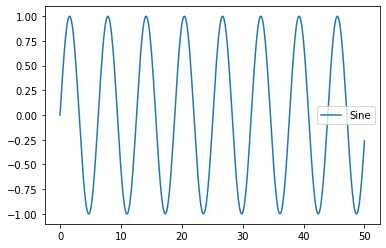

In [ ]:
df.plot()

In [ ]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


400/400 [==============================] - 4s 7ms/step - loss: 0.0020
Epoch 2/5
400/400 [==============================] - 3s 7ms/step - loss: 4.5252e-04
Epoch 3/5
400/400 [==============================] - 3s 7ms/step - loss: 1.2955e-04
Epoch 4/5
400/400 [==============================] - 3s 7ms/step - loss: 9.8491e-05
Epoch 5/5
400/400 [==============================] - 3s 7ms/step - loss: 8.9932e-05


In [ ]:
losses = pd.DataFrame(model.history.history)

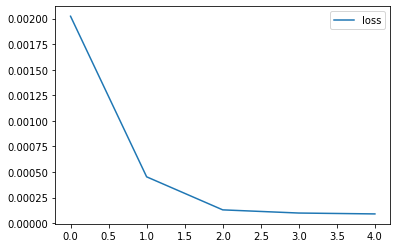

In [ ]:
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [ ]:
model.predict(first_eval_batch)

array([[0.95661545]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94739531])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))


In [ ]:
first_eval_batch

array([[8.44673344e-01],
       [8.06708858e-01],
       [7.65667635e-01],
       [7.21961392e-01],
       [6.76028576e-01],
       [6.28329973e-01],
       [5.79344082e-01],
       [5.29562316e-01],
       [4.79484071e-01],
       [4.29611720e-01],
       [3.80445567e-01],
       [3.32478833e-01],
       [2.86192709e-01],
       [2.42051522e-01],
       [2.00498086e-01],
       [1.61949253e-01],
       [1.26791734e-01],
       [9.53782193e-02],
       [6.80238411e-02],
       [4.50030107e-02],
       [2.65466667e-02],
       [1.28399581e-02],
       [4.02038667e-03],
       [1.76428007e-04],
       [1.34664361e-03],
       [7.51929419e-03],
       [1.86324574e-02],
       [3.45746492e-02],
       [5.51859418e-02],
       [8.02595684e-02],
       [1.09543997e-01],
       [1.42745456e-01],
       [1.79530875e-01],
       [2.19531235e-01],
       [2.62345262e-01],
       [3.07543459e-01],
       [3.54672408e-01],
       [4.03259327e-01],
       [4.52816804e-01],
       [5.02847693e-01],


In [ ]:
#predicted_value = [[[99]]] 
#np.append(current_batch[:,1:,:],predicted_value,axis=1)

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.95661545], dtype=float32),
 array([0.9776779], dtype=float32),
 array([0.9958491], dtype=float32),
 array([1.0080764], dtype=float32),
 array([1.0154585], dtype=float32),
 array([1.0158589], dtype=float32),
 array([1.0131712], dtype=float32),
 array([1.0027487], dtype=float32),
 array([0.9893601], dtype=float32),
 array([0.9680058], dtype=float32),
 array([0.9453298], dtype=float32),
 array([0.91461605], dtype=float32),
 array([0.8822397], dtype=float32),
 array([0.84368384], dtype=float32),
 array([0.804025], dtype=float32),
 array([0.7586589], dtype=float32),
 array([0.71322775], dtype=float32),
 array([0.66270924], dtype=float32),
 array([0.61358345], dtype=float32),
 array([0.5589885], dtype=float32),
 array([0.5062266], dtype=float32),
 array([0.45021212], dtype=float32),
 array([0.39682737], dtype=float32),
 array([0.34038806], dtype=float32),
 array([0.28843987], dtype=float32),
 array([0.23489217], dtype=float32),
 array([0.18680799], dtype=float32),
 array([0.1374485

In [ ]:
scaled_test

array([[ 9.47395314e-01],
       [ 9.67486902e-01],
       [ 9.82888874e-01],
       [ 9.93446722e-01],
       [ 9.99054531e-01],
       [ 9.99656047e-01],
       [ 9.95245234e-01],
       [ 9.85866341e-01],
       [ 9.71613455e-01],
       [ 9.52629556e-01],
       [ 9.29105085e-01],
       [ 9.01276034e-01],
       [ 8.69421575e-01],
       [ 8.33861265e-01],
       [ 7.94951833e-01],
       [ 7.53083610e-01],
       [ 7.08676604e-01],
       [ 6.62176295e-01],
       [ 6.14049162e-01],
       [ 5.64778001e-01],
       [ 5.14857089e-01],
       [ 4.64787216e-01],
       [ 4.15070672e-01],
       [ 3.66206198e-01],
       [ 3.18683988e-01],
       [ 2.72980774e-01],
       [ 2.29555036e-01],
       [ 1.88842410e-01],
       [ 1.51251313e-01],
       [ 1.17158850e-01],
       [ 8.69070248e-02],
       [ 6.07993170e-02],
       [ 3.90976314e-02],
       [ 2.20196733e-02],
       [ 9.73676418e-03],
       [ 2.37212264e-03],
       [-3.71235880e-07],
       [ 2.64308275e-03],
       [ 1.0

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Sine,predictions
45.090180,0.894755,0.913195
45.190381,0.934938,0.955319
45.290581,0.965741,0.991661
45.390782,0.986856,1.016115
45.490982,0.998072,1.030879
45.591182,0.999275,1.031680
45.691383,0.990453,1.026304
45.791583,0.971696,1.005460
45.891784,0.943191,0.978683
45.991984,0.905224,0.935975


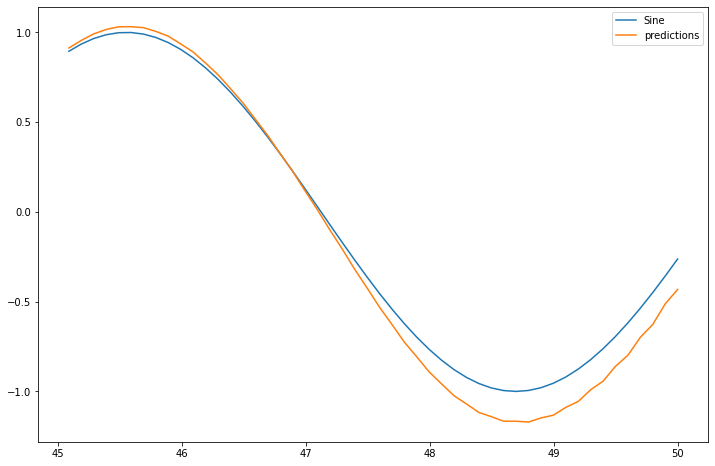

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=2)

In [ ]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length,batch_size=1)

In [ ]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,
                    callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
401/401 [==============================] - 9s 18ms/step - loss: 0.0192 - val_loss: 2.2112e-05
Epoch 2/20
401/401 [==============================] - 7s 17ms/step - loss: 2.2879e-04 - val_loss: 3.7148e-05
Epoch 3/20
401/401 [==============================] - 7s 17ms/step - loss: 1.1833e-04 - val_loss: 6.1109e-05


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


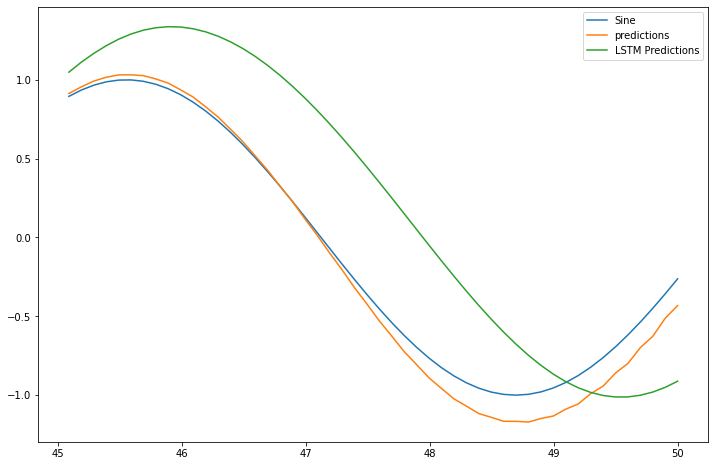

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions']=true_predictions
test.plot(figsize=(12,8))